# Car Prices

🎯 This exercise consists of the data preparation and feature selection techniques you have learnt today to a new dataset.

👇 Download the `ML_Cars_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv) and place it in the `data` folder.  Load into this notebook as a pandas dataframe named `df`, and display its first 5 rows.

In [6]:
# YOUR CODE HERE
import pandas as pd
df = pd.read_csv("data/Cars.csv")
df

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to use refer to it through the exercise.

# Duplicates

👇 Remove the duplicates from the dataset if there are any. Overwite the dataframe `df`.

In [7]:
# YOUR CODE HERE
df = df.drop_duplicates() 
len(df)

191

# Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median

Make changes effective in the dataset `df`.

In [8]:
# YOUR CODE HERE
(df.isnull().sum()/len(df))*100

aspiration        0.000000
enginelocation    5.235602
carwidth          1.047120
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

## `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations of missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since there is less than 30% of missing values.
</details> 

In [9]:
# YOUR CODE HERE
from sklearn.impute import SimpleImputer
import numpy as np
df.carwidth.replace("*", np.nan, inplace=True) 

imputer = SimpleImputer(strategy="median")
imputer.fit(df[['carwidth']])

df['carwidth'] = imputer.transform(df[['carwidth']])

/Users/selmalopez/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/4240164565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carwidth'] = imputer.transform(df[['carwidth']])


## `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is front, impute with the most frequent.
</details>

In [10]:
# YOUR CODE HERE
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['enginelocation']])

df['enginelocation'] = imputer.transform(df[['enginelocation']])
imputer.statistics_

/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/2011589843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enginelocation'] = imputer.transform(df[['enginelocation']])


array(['front'], dtype=object)

### ☑️ Test your code

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_carwidth PASSED   [ 50%]
tests/test_missing_values.py::TestMissing_values::test_engine_location PASSED [100%]

============================== 2 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns by the transformed values.

## `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

In [12]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler() 
r_scaler.fit(df[['peakrpm']]) 
df['peakrpm'] = r_scaler.transform(df[['peakrpm']]) 
df.head()

r_scaler = RobustScaler() 
r_scaler.fit(df[['carwidth']]) 
df['carwidth'] = r_scaler.transform(df[['carwidth']]) 
df.head()

r_scaler = RobustScaler() 
r_scaler.fit(df[['stroke']]) 
df['stroke'] = r_scaler.transform(df[['stroke']]) 
df.head()


/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/2942775194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peakrpm'] = r_scaler.transform(df[['peakrpm']])
/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/2942775194.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carwidth'] = r_scaler.transform(df[['carwidth']])
/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/2942775194.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


In [0]:
# YOUR CODE HERE

## `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/1353944289.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['curbweight'] = scaler.transform(df[['curbweight']]) # Use scaler to transform data


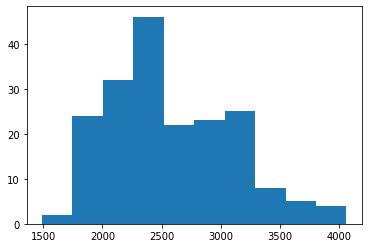

In [13]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.hist(df['curbweight']) # Check feature distribution

scaler = StandardScaler() # Instanciate StandarScaler

scaler.fit(df[['curbweight']]) 

df['curbweight'] = scaler.transform(df[['curbweight']]) # Use scaler to transform data


In [0]:
# YOUR CODE HERE

### ☑️ Test your code

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 4 items

tests/test_scaling.py::TestScaling::test_carwidth PASSED                 [ 25%]
tests/test_scaling.py::TestScaling::test_curbweight PASSED               [ 50%]
tests/test_scaling.py::TestScaling::test_peakrpm PASSED                  [ 75%]
tests/test_scaling.py::TestScaling::test_stroke PASSED                   [100%]

============================== 4 passed in 0.53s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Encoding

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features by their encoded version(s).

## `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [15]:
# YOUR CODE HERE
import numpy as np
from sklearn.preprocessing import OneHotEncoder

df.aspiration.unique() # Check unique values for streets (2)

ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instanciate encoder for binary feature

ohe.fit(df[['aspiration']]) # Fit encoder

df['aspiration'] = ohe.transform(df[['aspiration']]) # Encode Street

df.head()

/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/2430444190.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aspiration'] = ohe.transform(df[['aspiration']]) # Encode Street


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


## `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [16]:
# YOUR CODE HERE

df.enginetype.unique()  # Check unique values for streets (3)

ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(df[['enginetype']]) # Fit encoder

engine_encoded = ohe.transform(df[['enginetype']]) # Encode alley

#df["enginetype"] = engine_encoded.T 

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


## `cylindernumber`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded.
</details>

In [17]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [18]:
# YOUR CODE HERE
from sklearn.preprocessing import OrdinalEncoder
dict_i = {'four': 4,
'six': 6,
'five': 5,
'three':3,
'twelve':12,
'two': 2,
'eight':8 }
df['cylindernumber'] = df['cylindernumber'].map(dict_i)
df.head()

/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/2227170335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylindernumber'] = df['cylindernumber'].map(dict_i)


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,front,-0.518519,-0.048068,dohc,4,-2.033333,-0.142857,expensive
2,0.0,front,0.000000,0.476395,ohcv,6,0.600000,-0.142857,expensive
3,0.0,front,0.000000,-0.450474,ohc,4,0.366667,0.571429,expensive
4,0.0,front,0.333333,0.478302,ohc,5,0.366667,0.571429,expensive
5,0.0,front,0.296296,-0.126260,ohc,5,0.366667,0.571429,expensive


## `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [32]:
# YOUR CODE HERE
from sklearn.preprocessing import OrdinalEncoder
encoder =  OrdinalEncoder()
price_encoder = encoder.fit(df[['price']])
df['price']= price_encoder

/var/folders/5t/r6_mkf0x1zl9f1rvdldpw7pr0000gn/T/ipykernel_32762/412653689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']= price_encoder


In [35]:
print(df)

     aspiration enginelocation  carwidth  curbweight enginetype  \
0           0.0          front -0.518519   -0.048068       dohc   
2           0.0          front  0.000000    0.476395       ohcv   
3           0.0          front  0.000000   -0.450474        ohc   
4           0.0          front  0.333333    0.478302        ohc   
5           0.0          front  0.296296   -0.126260        ohc   
..          ...            ...       ...         ...        ...   
200         0.0          front  1.259259    0.722416        ohc   
201         1.0          front  1.222222    0.907408        ohc   
202         0.0          front  1.259259    0.836844       ohcv   
203         1.0          front  1.259259    1.227807        ohc   
204         1.0          front  1.259259    0.932201        ohc   

     cylindernumber    stroke   peakrpm             price  
0                 4 -2.033333 -0.142857  OrdinalEncoder()  
2                 6  0.600000 -0.142857  OrdinalEncoder()  
3              

### ☑️ Test your code

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 5 items

tests/test_encoding.py::TestEncoding::test_aspiration PASSED             [ 20%]
tests/test_encoding.py::TestEncoding::test_cylindernumber PASSED         [ 40%]
tests/test_encoding.py::TestEncoding::test_enginelocation FAILED         [ 60%]
tests/test_encoding.py::TestEncoding::test_enginetype FAILED             [ 80%]
tests/test_encoding.py::TestEncoding::test_price FAILED                  [100%]

=================================== FAILURES ===================================
_______________________ TestEncoding.test_enginelocation _______________________

self = <tests.test_encodi

# Collinearity

👇 Perform a collinearity investigation on the dataset and remove unecessary features. Make changes effective in the dataframe `df`.

In [0]:
# YOUR CODE HERE


ℹ️ Out of the highly correlated feature pairs, remove the one with less granularity.

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('collinearity',
                         dataset = df)
result.write()
print(result.check())

# Base Modelling

👇 Cross validate a Logistic regression model. Save its score under variable name `base_model_score`.

In [0]:
# YOUR CODE HERE

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

# Feature Selection

👇 Perform feature permutation to remove the weak features from the feature set. With that strong feature set, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [0]:
# YOUR CODE HERE

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

# 🏁